In [1]:
import numpy as np
N=50
miu=50
var=8
cl=0.95

pop = list(np.random.normal(miu,var,size=(N)).astype(int))

In [2]:

#sum(pop)/len(pop)
#ragam=0;
#for z in pop:
    #ragam+=((z-np.mean(pop))**2)/(N)

In [3]:
import math
print(pop)
print(np.mean(pop))
miu=np.mean(pop)
print(np.std(pop,ddof=0))
#Other function print(np.std(pop,ddof=0))

[42, 48, 47, 61, 49, 44, 39, 58, 73, 38, 43, 44, 52, 48, 41, 58, 42, 39, 55, 44, 42, 48, 54, 52, 56, 44, 40, 54, 42, 46, 43, 58, 54, 46, 59, 48, 50, 38, 52, 58, 42, 61, 53, 46, 46, 54, 53, 49, 51, 60]
49.28
7.351299204902491


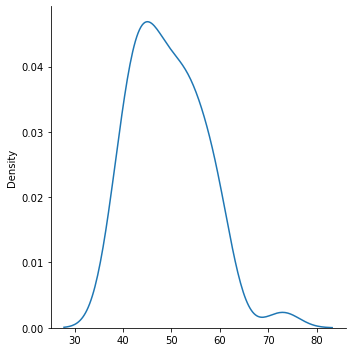

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(pop, kind='kde')

plt.show()

In [5]:
n=5
#Sampel 
sampel=np.random.choice(pop,n,replace=False)


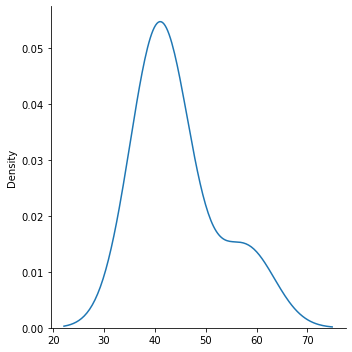

In [6]:

sns.displot(sampel,kind='kde')

plt.show()


In [7]:
import math
#Rerata dan standar deviasi:
xbar=sum(sampel)/len(sampel)
#bisa juga dengan xbar=np.mean(sampel) *kalau ada yg susah kenapa harus mudah
ragam=0;
for z in sampel:
    ragam+=((z-xbar)**2)/(n-1)
sd=math.sqrt(ragam)
#bisa juga dengan ragam=np.std(sampel,ddof=1) *kalau ada yg susah kenapa harus mudah
print(xbar)

44.4


In [8]:
import scipy.stats as st
#find T critical value
nilai_t=st.t.ppf(q=1-(1-cl)/2,df=n-1)
tolerance=nilai_t*sd/math.sqrt(n)
upper=max([xbar+tolerance,xbar-tolerance])
lower=min([xbar+tolerance,xbar-tolerance])


#bisa juga pakai 
#import scipy.stats as st
#st.t.interval(alpha=0.95, df=len(sampel)-1, loc=np.mean(sampel), scale=st.sem(sampel)) 

In [9]:
lower,upper

(34.758097287804006, 54.04190271219599)

In [10]:
st.t.interval(alpha=cl, df=len(sampel)-1, loc=np.mean(sampel), scale=st.sem(sampel)) 

(34.758097287804006, 54.04190271219599)

In [ ]:
#st.ttest_1samp(a=sampel, popmean=57)

In [11]:
#get all combinations of sample from the population-> NCn
import itertools
p = list(itertools.combinations(pop,n))

In [25]:
CI_all=[]
eror=[]
mean_all=[]
upper_all=[]
lower_all=[]
for i in p:
    CI_all.append(st.t.interval(alpha=cl, df=len(i)-1, loc=np.mean(i), scale=st.sem(i)) )
    salah=(st.t.ppf(q=1-(1-cl)/2,df=n-1))*(np.std(i,ddof=1))/math.sqrt(n)
    eror.append(salah)
    mean_all.append(np.mean(i))
    upper_all.append(max([np.mean(i)+salah,np.mean(i)-salah]))
    lower_all.append(min([np.mean(i)+salah,np.mean(i)-salah]))
    

C:\Users\istyw\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\istyw\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


KeyboardInterrupt: 

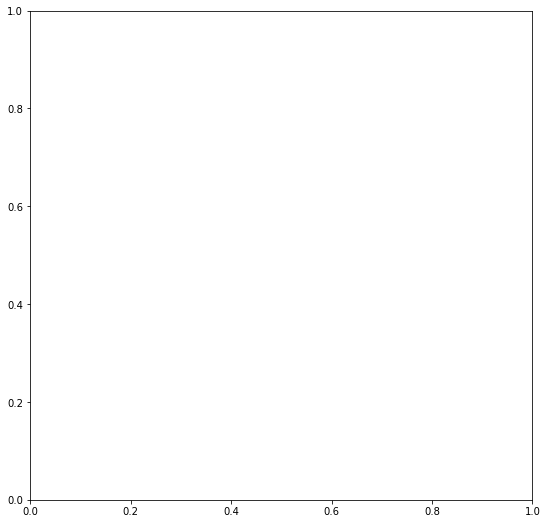

In [281]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.errorbar(x=list(range(len(aps))), y=mean_all, yerr=eror,fmt='o',ecolor = 'blue',color='yellow')

In [28]:
#Create list of mean of all possible sample that is between CI 
mean_in_CI=[]
for i in range(len(p)):
    if miu>=lower_all[i] and miu<=upper_all[i]:
        mean_in_CI.append(mean_all[i])

In [37]:
#Calculate how many mean of possible sample is between CI 

len(mean_in_CI)/len(p)

0.9463709905793954

In [32]:
miu

49.28

In [36]:
len(mean_in_CI)/len(p)

0.9463709905793954

In [33]:
CI_all[:10],lower_all[:10], upper_all[:10]

([(40.68178552783522, 58.11821447216478),
  (39.16649359726893, 57.633506402731065),
  (36.915472722137565, 57.88452727786243),
  (41.28999656112408, 61.11000343887593),
  (38.50878594039558, 69.89121405960442),
  (36.39680963919653, 58.00319036080347),
  (38.768256192414874, 57.63174380758513),
  (39.16649359726893, 57.633506402731065),
  (41.176319420786704, 58.823680579213296),
  (40.44648896862308, 57.95351103137693)],
 [40.68178552783522,
  39.16649359726893,
  36.915472722137565,
  41.28999656112408,
  38.50878594039558,
  36.39680963919653,
  38.768256192414874,
  39.16649359726893,
  41.176319420786704,
  40.44648896862308],
 [58.11821447216478,
  57.633506402731065,
  57.88452727786243,
  61.11000343887593,
  69.89121405960442,
  58.00319036080347,
  57.63174380758513,
  57.633506402731065,
  58.823680579213296,
  57.95351103137693])

In [106]:
upper

111.53102368216048

In [166]:
print(CI_all[0],mean_all[0],upper_all[0],lower_all[0],eror[0])

(-241.95533523293295, 330.95533523293295) 44.5 330.95533523293295 -241.95533523293295 286.45533523293295


In [74]:
#Perform Bootstrap Sampel
bs_sampel=[]
for i in range (100000):
    bs=[]
    for j in range (20):
        bs.append(sampel[random.randint(0,n-1)])
    bs_sampel.append(bs)
bs_sampel


[[4, 4, 4, 4, 3, 6, 6, 3, 6, 6, 4, 4, 8, 4, 6, 6, 4, 8, 3, 4],
 [8, 6, 6, 4, 6, 4, 4, 4, 4, 8, 6, 6, 3, 4, 4, 3, 6, 4, 3, 4],
 [8, 3, 3, 4, 4, 4, 4, 3, 4, 4, 6, 3, 8, 4, 6, 4, 6, 4, 8, 4],
 [4, 3, 4, 4, 6, 3, 4, 4, 3, 4, 4, 8, 6, 3, 4, 4, 4, 8, 4, 4],
 [4, 4, 4, 8, 3, 4, 4, 6, 6, 8, 3, 8, 8, 4, 4, 6, 4, 4, 6, 4],
 [4, 3, 4, 3, 8, 4, 4, 3, 4, 8, 3, 3, 3, 6, 6, 4, 4, 4, 4, 8],
 [6, 8, 4, 3, 4, 4, 4, 3, 4, 6, 3, 4, 4, 4, 6, 8, 4, 8, 8, 6],
 [4, 4, 4, 8, 8, 4, 4, 3, 8, 3, 4, 6, 4, 4, 4, 6, 4, 3, 8, 4],
 [3, 4, 8, 4, 3, 6, 8, 3, 3, 3, 3, 8, 6, 6, 4, 8, 3, 4, 4, 3],
 [4, 6, 4, 8, 3, 4, 8, 4, 4, 4, 3, 3, 4, 8, 4, 4, 3, 4, 6, 3],
 [3, 4, 4, 3, 8, 4, 4, 6, 3, 4, 4, 8, 3, 6, 4, 6, 4, 4, 4, 3],
 [6, 4, 6, 3, 6, 4, 4, 4, 4, 4, 4, 4, 3, 4, 6, 8, 3, 4, 6, 4],
 [8, 4, 4, 4, 6, 8, 4, 3, 4, 8, 3, 4, 4, 4, 3, 6, 4, 4, 6, 4],
 [6, 4, 6, 4, 3, 4, 4, 6, 8, 4, 4, 4, 4, 3, 6, 8, 4, 6, 4, 4],
 [4, 3, 4, 4, 3, 3, 4, 6, 6, 6, 3, 3, 3, 4, 3, 4, 4, 6, 6, 4],
 [4, 8, 4, 4, 4, 4, 8, 4, 4, 4, 4, 3, 6, 4, 4, 3, 8, 6,

In [75]:
bs_mean=[sum(z)/len(z) for z in bs_sampel]
bs_mean_mean=sum(bs_mean)/len(bs_mean)
bs_mean_mean,xbar



(4.600387999999996, 4.6)

In [77]:
#Prove CI
n=5
sampel_100=[]
CI_100=[]
eror=[]
mean_100=[]
for i in range(10):
        sampel_100.append(list(np.random.choice(pop,n,replace=False)))
        CI_100.append(st.t.interval(alpha=0.95, df=len(sampel_100[i])-1, loc=np.mean(sampel_100[i]), scale=st.sem(sampel_100[i])) )
        eror.append((st.t.ppf(q=1-.05/2,df=n-1))*(np.std(sampel_100[i],ddof=1))/math.sqrt(n))
        mean_100.append(np.mean(sampel_100[i]))